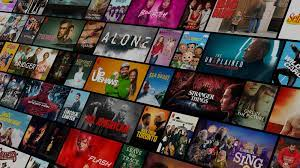

### Problem Identification:

The movie industry keep growing bigger day-by-day and movie content providers in a bid to ensure that their subscribers derive maximum satisfaction deviced a way to give the subscribers range of other related movies when they search for a particular movie on their potal. This helps contact providers retain their subscriber-base as well as generate more revenue.

This project will be about developing a Content-based movie recommendation system that provide a user with ten(10) other related movies once the use searches for a particular movie.

Movie recommendations will made base on Type, Title, Director(s), Cast and Describtion. 

In [4]:
import pandas as pd

In [5]:
movie_dataset = pd.read_csv('netflix_titles.csv')

### Data Exploration


In [6]:
movie_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
movie_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [38]:
movie_dataset.shape

(8807, 12)

In [8]:
movie_dataset.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [9]:
movie_dataset.duplicated().sum()

0

In [10]:
movie_dataset.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Data Preprocessing

In [11]:
# Filling the Null values

movie_dataset['rating'] = movie_dataset['rating'].fillna(movie_dataset['rating'].mode()[0])
movie_dataset['duration'] = movie_dataset['duration'].fillna(movie_dataset['duration'].mode()[0])
movie_dataset['date_added'] = movie_dataset['date_added'].fillna(movie_dataset['date_added'].mode()[0])
movie_dataset['country'] = movie_dataset['country'].fillna(movie_dataset['country'].mode()[0])
movie_dataset['director'] = movie_dataset['director'].fillna('unobtainable')
movie_dataset['cast'] = movie_dataset['cast'].fillna('unobtainable')

In [12]:
movie_dataset.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Visualization

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

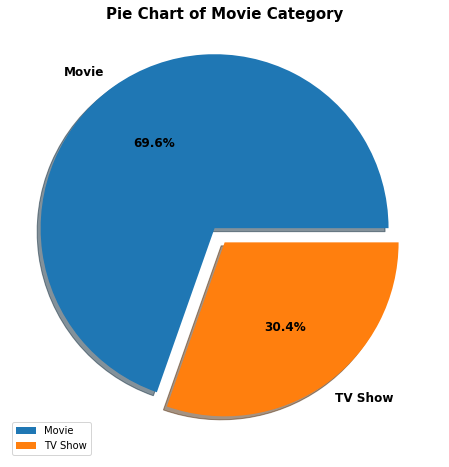

In [27]:
plt.figure(figsize = (10,8))
plt.pie(movie_dataset['type'].value_counts(),
        labels = movie_dataset.type.unique(), autopct= '%.1f%%', shadow = True, 
        explode = (0.1, 0),
        textprops = {'size': 'large', 'fontweight': 'bold'}
       )
plt.legend()
plt.title('Pie Chart of Movie Category', fontsize = 15, fontweight = 'bold')
plt.show()

<AxesSubplot:xlabel='type', ylabel='count'>

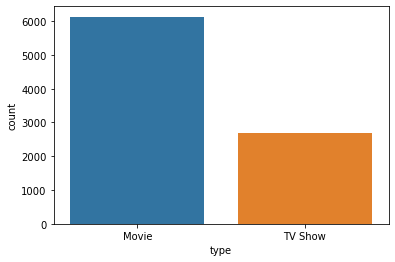

In [30]:
plt.figure(figsize = (6,4))
sns.countplot(x = movie_dataset['type'])

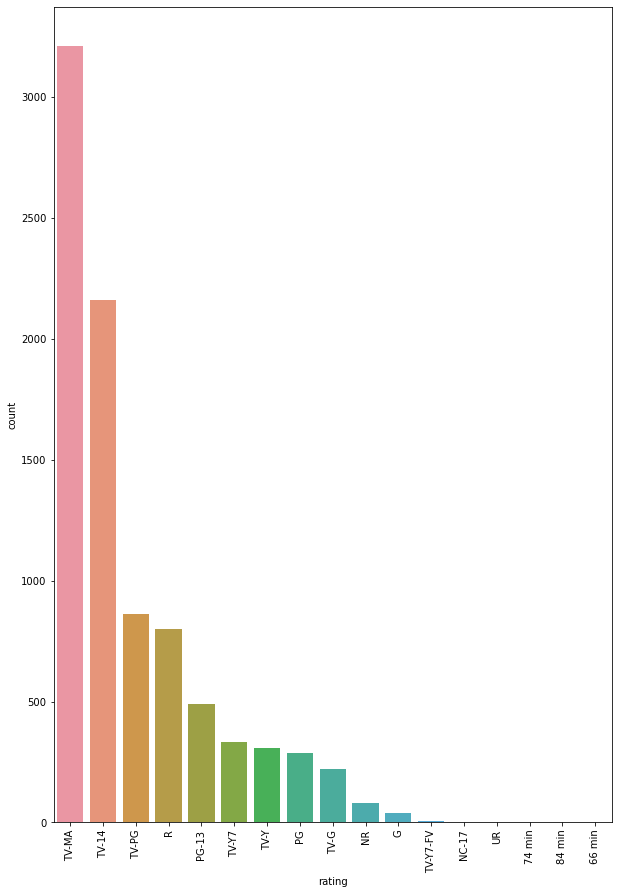

In [52]:
plt.figure(figsize =(10,15))
sns.countplot(x = movie_dataset['rating'], order = movie_dataset['rating'].value_counts().index[0:17],
             )
ax= plt.xticks(rotation = 90)


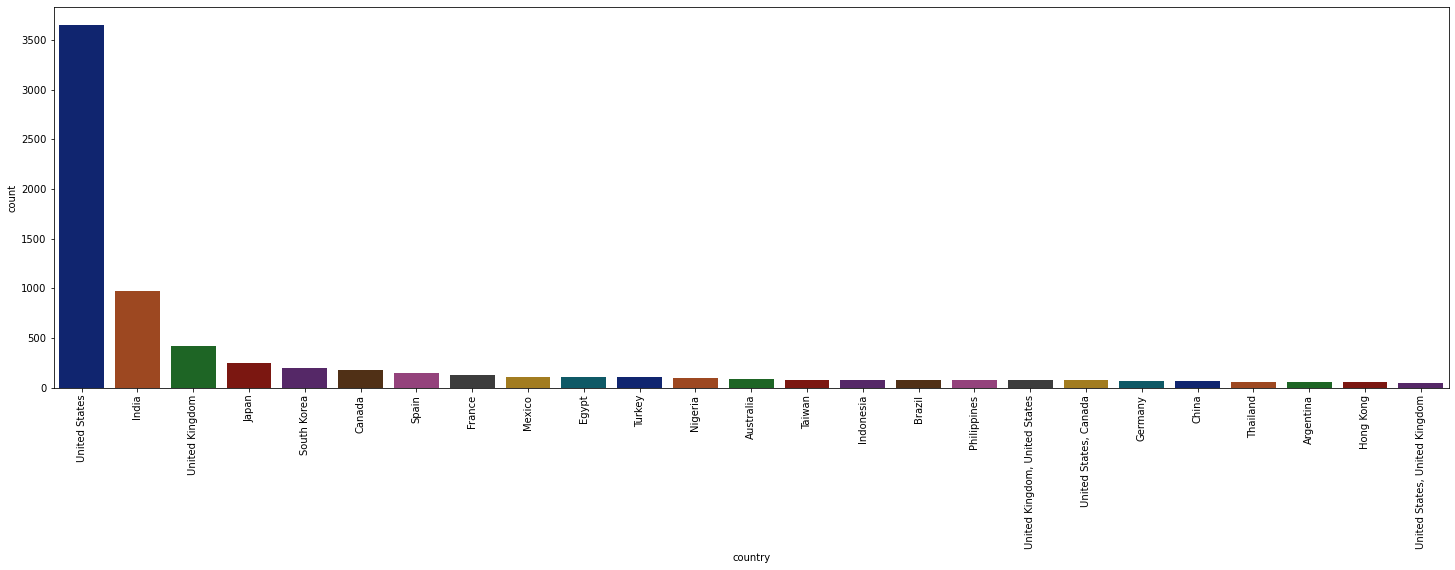

In [50]:
#Visualizing the top 25 movie producing countries 
plt.figure(figsize = (25,7))
sns.countplot(x = movie_dataset['country'], order = movie_dataset['country'].value_counts().index[0:25], palette="dark")
ax = plt.xticks(rotation = 90)

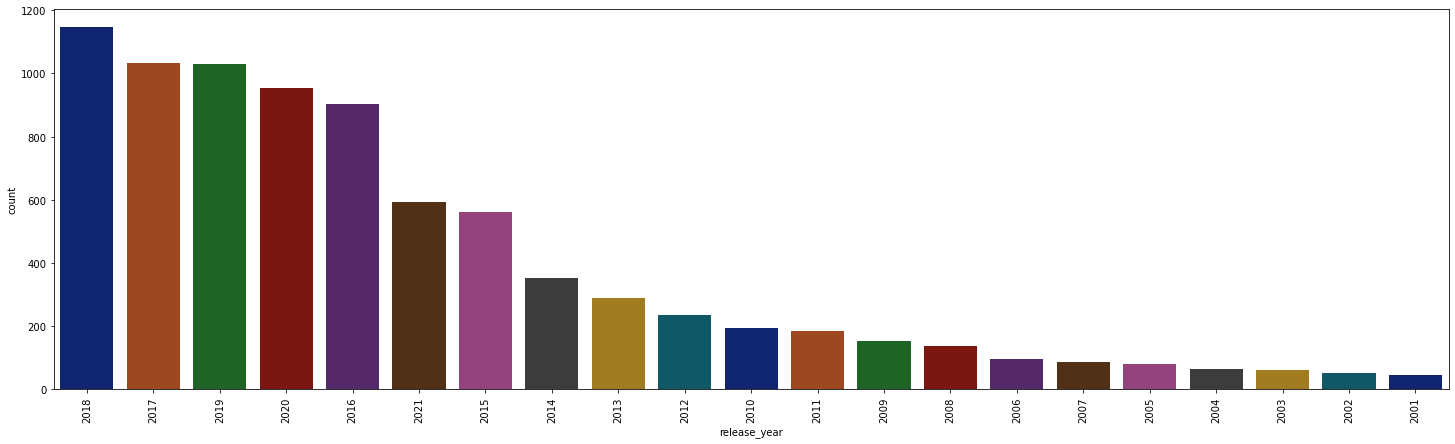

In [53]:
# Visualizing the top 20 release year
plt.figure(figsize = (25,7))
sns.countplot(x = movie_dataset['release_year'], order = movie_dataset['release_year'].value_counts().index[0:21], palette="dark")
ax = plt.xticks(rotation = 90)